In [1]:
import os
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks_cwt
import warnings
warnings.filterwarnings("ignore")

**Calculating vaf peaks**

In [2]:
filename ="Heatmap_CP_VAF_CN.xlsx"
data=pd.read_excel(filename, index_col=None)

In [3]:
S ="A1" ##choose one sample for calculating vaf peak
l =[1,4,"4a"] ## form the cluster_id or user_id , identify the cluster you want to plot for the that sample
colors = ['black','red','purple'] #assign colors for the plot

In [4]:
x= S +"_major_cn"
P=S+"_VAF"
z="_id"

In [5]:
data= data[data[x] == 2] # choose only diploid mutation for vaf peak 
x2= data.filter(regex=z)
x3= data.filter(regex=P)
x4= pd.concat([x2,x3],axis=1) 
data=x4

**VAF_Peak - Method:1**

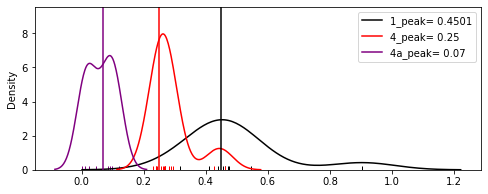

In [6]:
A = data.loc[data['use_id'] == 1]
B = data.loc[data['use_id'] == 4]
C = data.loc[data['use_id'] == "4a"]  
plt.figure(figsize=(8, 3))
#plt.style.use("seaborn")
sns.distplot(A[[P]], hist=False, rug=True, color= "black")
sns.distplot(B[[P]], hist=False, rug=True, color= "red")
sns.distplot(C[[P]], hist=False, rug=True, color= "purple")
#sns.distplot(D[[y]], hist=False, rug=True, label="4",color= "green")
#sns.distplot(E[[y]], hist=False, rug=True, label="10",color= "blue")
#sns.distplot(F[[y]], hist=False, rug=True, label="10",color= "lightblue")


xcoords = [0.4501, 0.25, 0.07]
colors = ['black','red','purple']
l =[1,4,"4a"]

for xc,c,l in zip(xcoords,colors,l):
    plt.axvline(x=xc, label='{}_peak= {}'.format(l,xc), c=c)
plt.legend()

plt.savefig(P+".pdf",bboxinches='tight')

plt.show()

**VAF_Peak - Method:2**

In [7]:
S ="A1"
cluster=[1,4,"4a"]
colors = ['black','red','green']

In [8]:
clus_name = [str(i) for i in cluster]
clus_name = ["A"+i for i in clus_name]

In [9]:
x= S +"_major_cn"

P=S+"_VAF"

z="_id"
#data= data[data[x] == 2]
x2= data.filter(regex=z)
x3= data.filter(regex=P)
x4= pd.concat([x2,x3],axis=1) 
data=x4

Text(0.0, 1.0, 'A1_VAF')

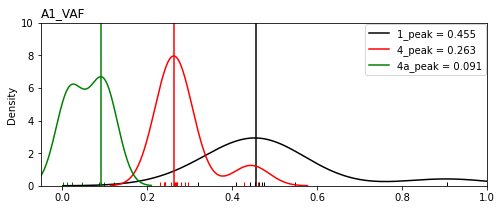

In [10]:
#os.chdir("/Users/sarunach/Desktop/clonesize/"+ newdir)
plt.figure(figsize=(8, 3))
for l,m,c in zip(cluster,clus_name,colors):
    m= data.loc[data['use_id'] == l]
    ax=sns.distplot(m[[P]], hist=False, rug=True,  color=c)
    x = ax.lines[-1].get_xdata() # Get the x data of the distribution
    y = ax.lines[-1].get_ydata() # Get the y data of the distribution
    maxid = np.argmax(y)
    plt.axvline(x=x[maxid],c=c, label='{}_peak = {}'.format(l,round(x[maxid],3)))
#plt.axvline(x=0.33,c="black", label=("1_peak(c)=0.33"))
ax.legend(loc='best', bbox_to_anchor=(1.009, 1.02))  
ax.set_xlim(-0.05,1)
ax.set_ylim(0,10)
plt.title(P,loc='left')
#plt.savefig(P+"vaf.pdf",bboxinches='tight')    